# Practical Session : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

First, you have to download a set of images that you will use throughout the TP: https://partage.imt.fr/index.php/s/9YPTAzKsiXHQWH3

In [1]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.segmentation as seg
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical orphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the function morpho.disk() of the morpho library to visualize a disk structuring element of radius 5. 

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


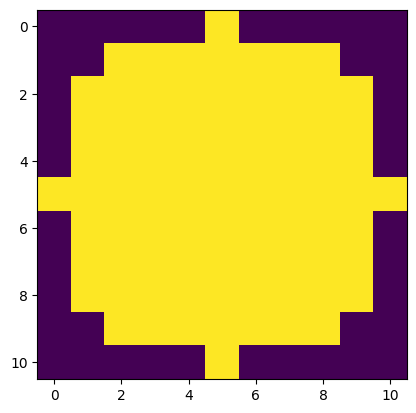

In [44]:
if student :
  strell = morpho.disk(5)

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


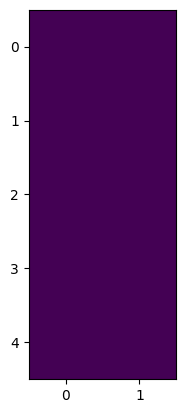

In [4]:
def line_strell(width,length):
  if student :
    strell = morpho.rectangle(length,width)
  return strell

strell = line_strell(2,5)
print(strell)
plt.imshow(strell)
plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

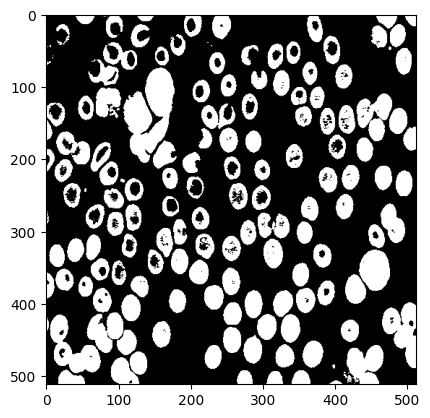

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [24]:
t = 150

#load the cell image in grayscale and display it 
if student:
  img = skio.imread("images/cell.tif")
  binary_img = img<t
  plt.imshow(binary_img,cmap = "gray")
  plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

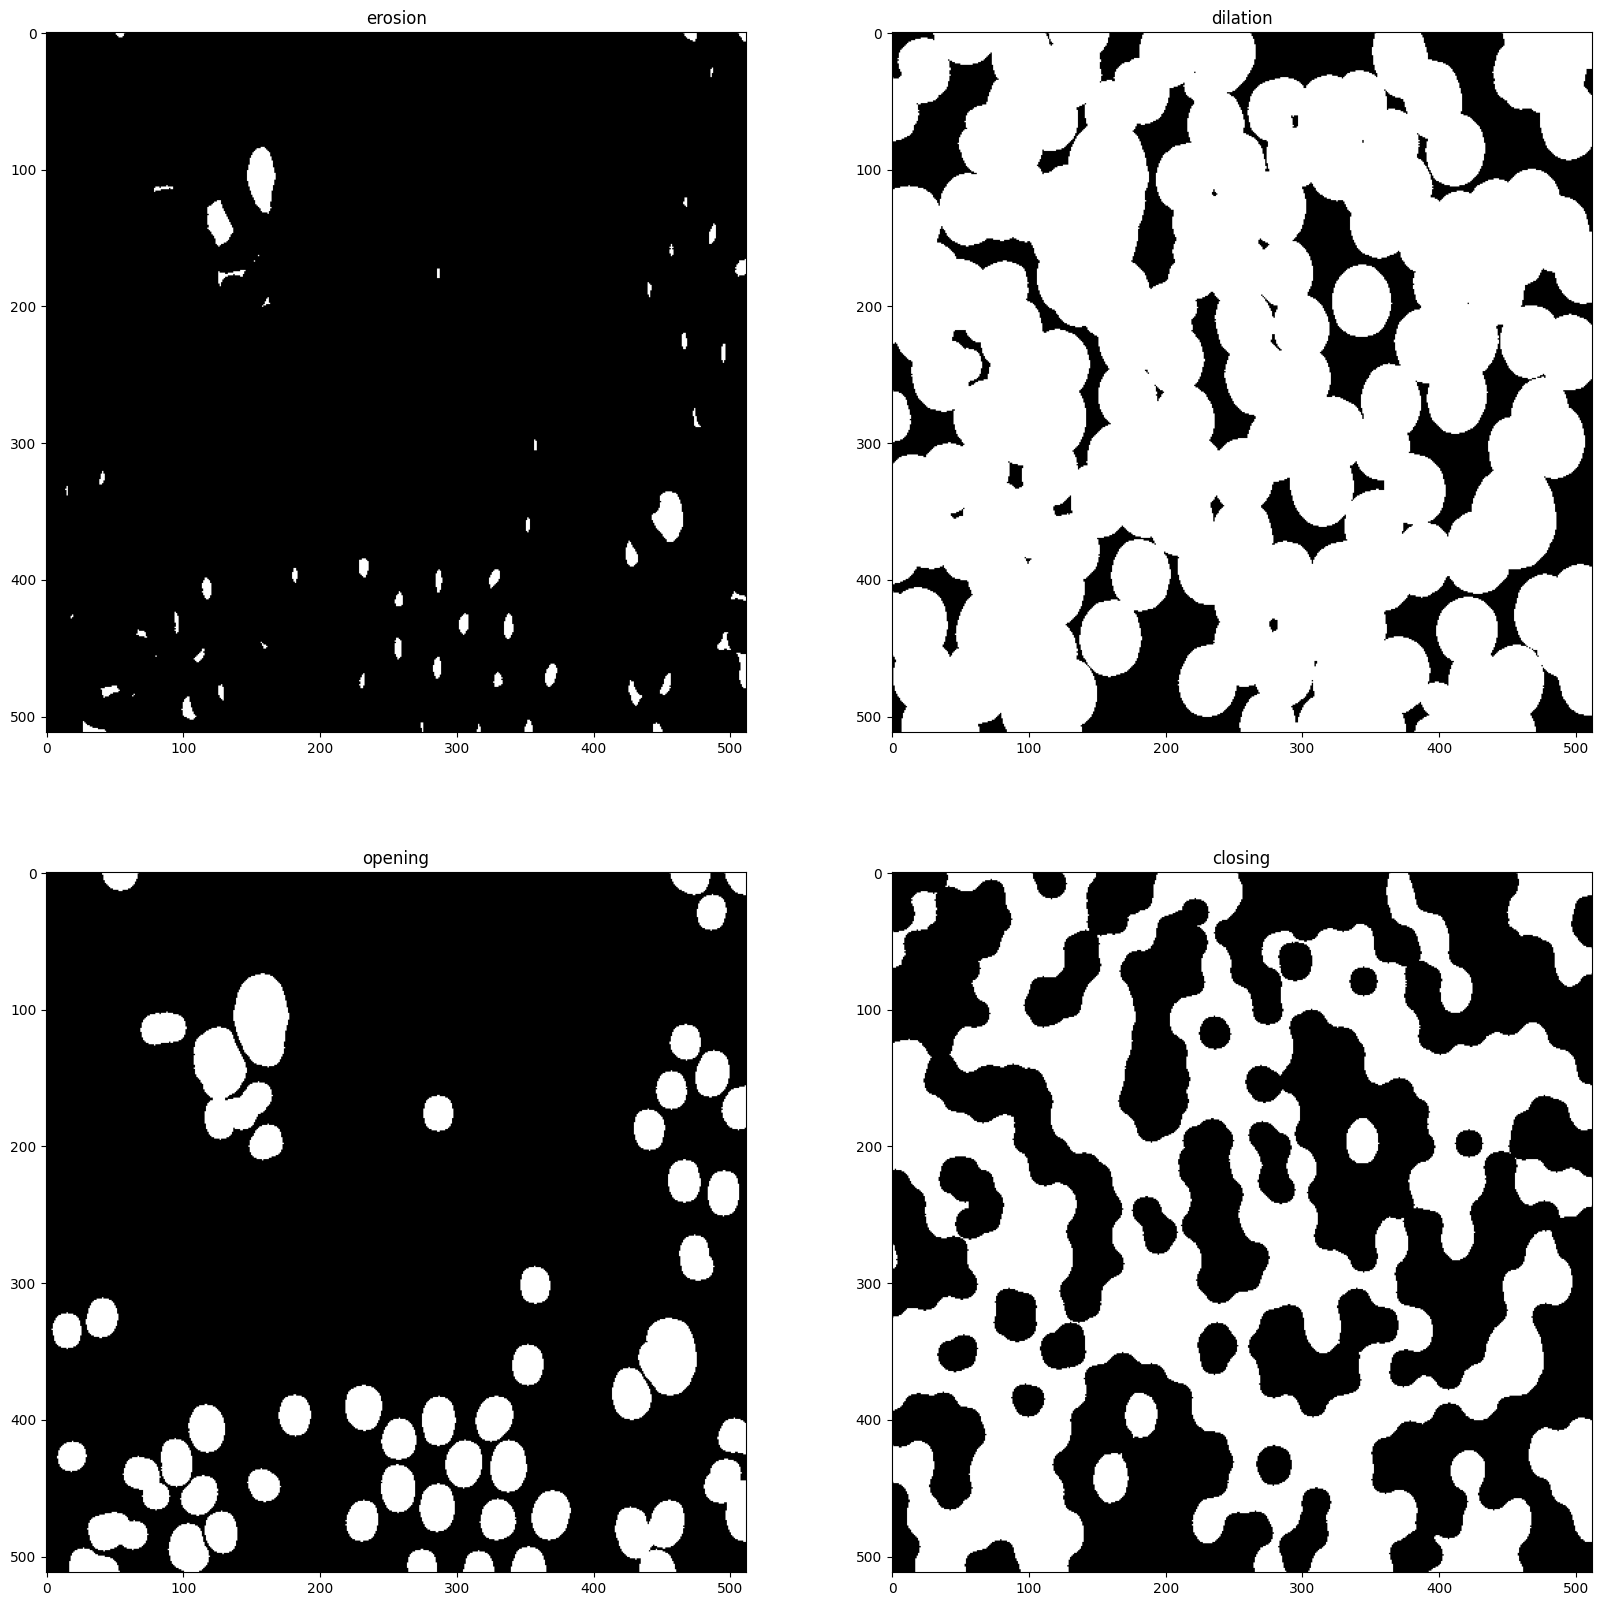

In [27]:
strell = morpho.disk(2)
fig,ax = plt.subplots(2, 2, figsize=(20,20))

# try your own structuring elements and make the size vary
if student :
  strell = morpho.disk(10)
  #strell = line_strell(3,10)

imgs = [morpho.erosion(binary_img,strell),morpho.dilation(binary_img,strell),morpho.opening(binary_img,strell),morpho.closing(binary_img,strell)]# Add in this list the 4 images, obtained with the four operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
plt.show()  

- **Q** : What is the influence of the shape of the structuring element ?
- **A** : The erosion erases objects who do not contain the structuring element, dilation makes them grow along the directions of the structuring element, opening separates them with borders that have the same shape as the structuring element and closing creates junctions which have the shape of the structuring element between them.

- **Q** : What is the influence of the size of the structuring element ?
- **A** : The size of the structuring element determines which objects get erased by the erosion, how much they grow after the dilation, how many are left after the opening and how easy it is for two of them to become connected after the closing.

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


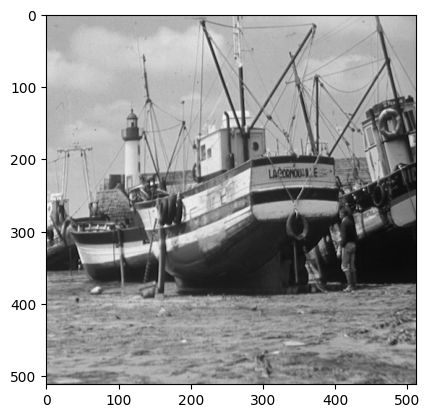

In [28]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes.

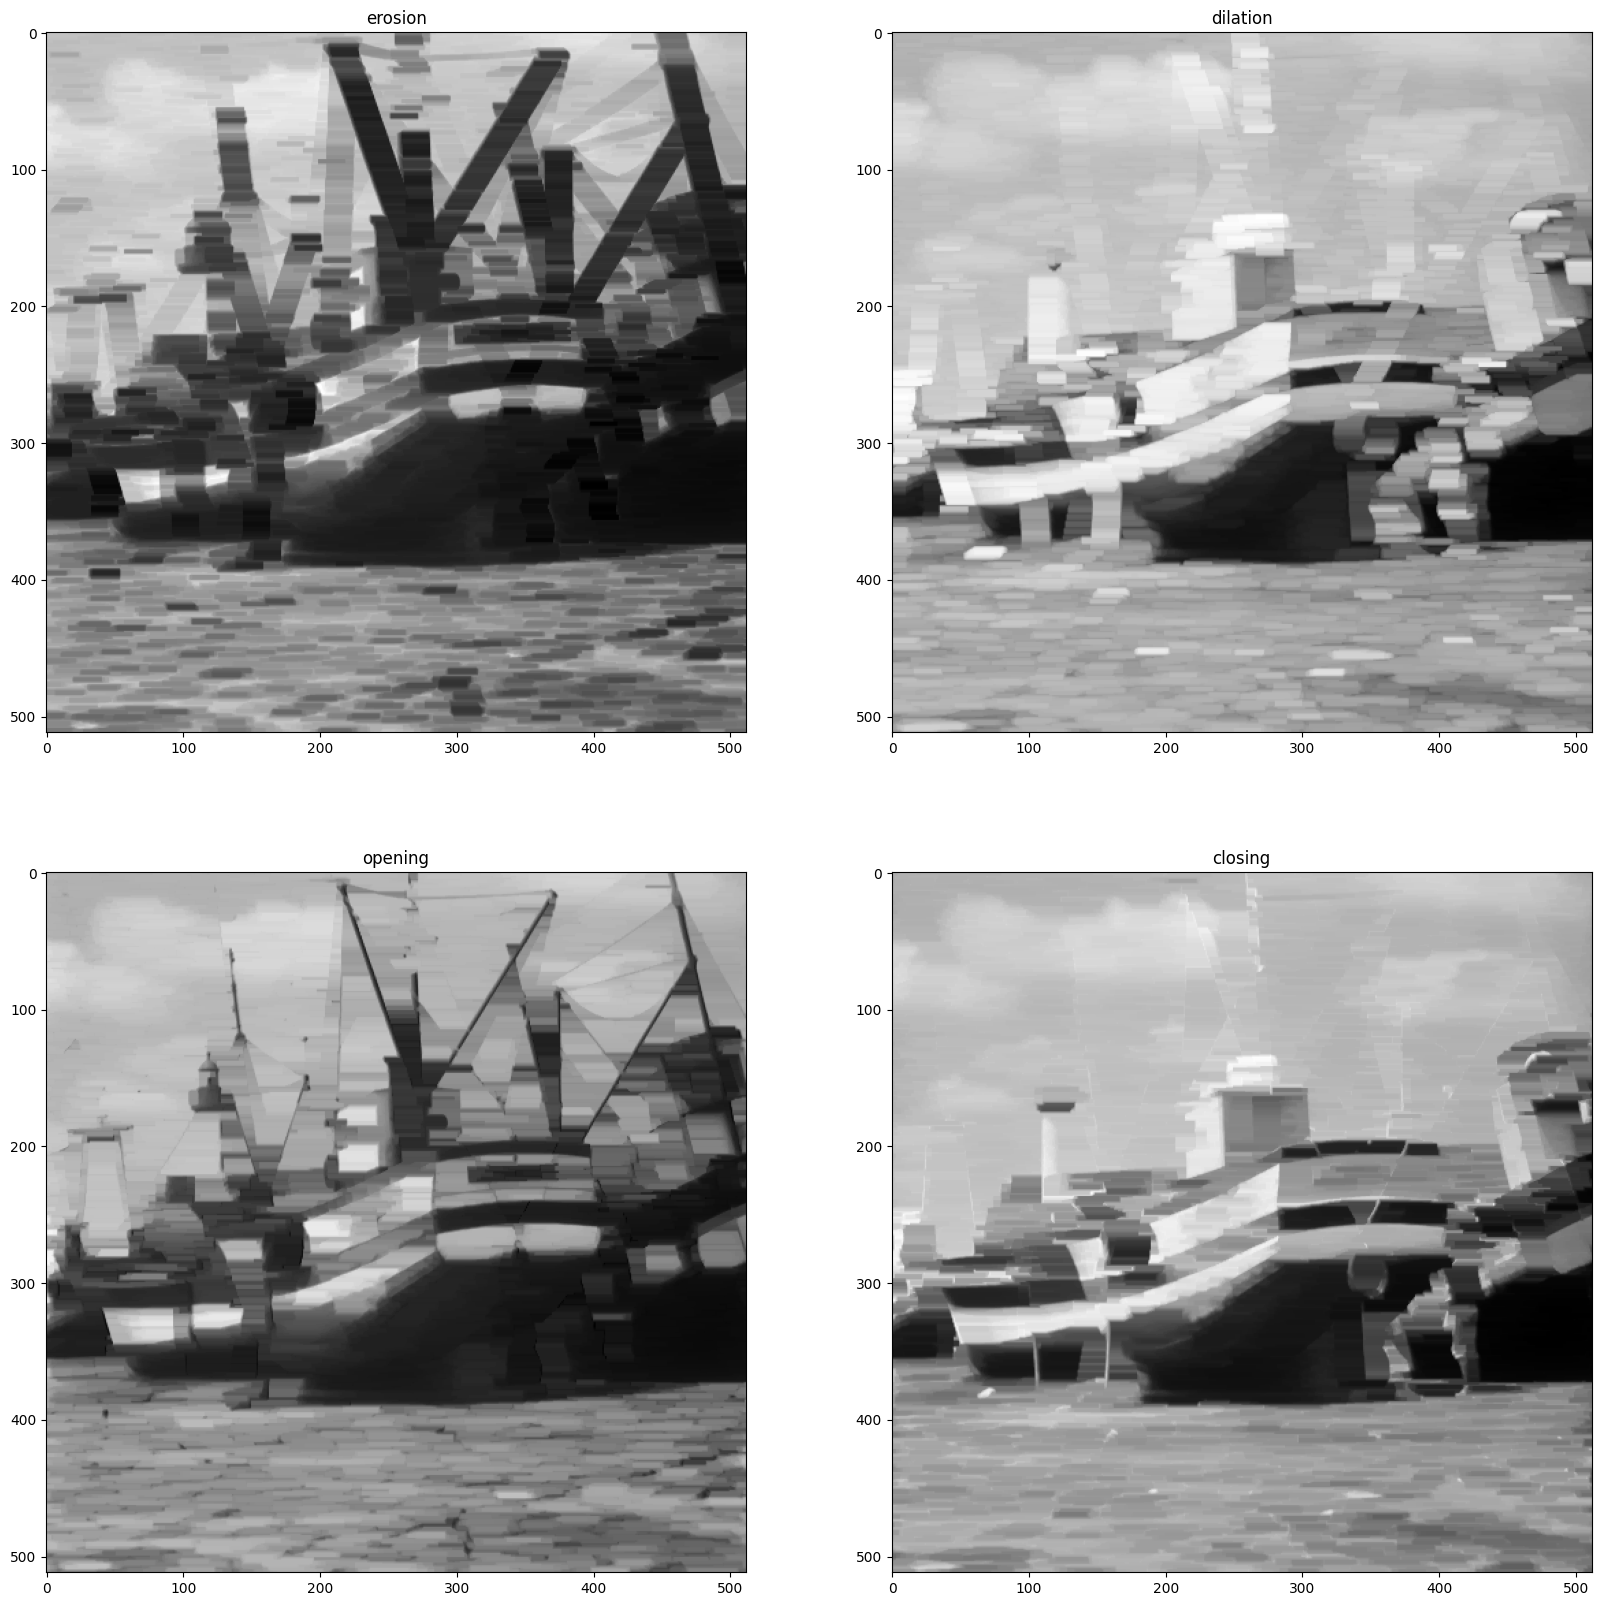

In [34]:
fig,ax = plt.subplots(2, 2, figsize=(20,20))

if student:
  #strell = morpho.disk(5)
  strell = line_strell(20,3)

imgs = [morpho.erosion(img,strell),morpho.dilation(img,strell),morpho.opening(img,strell),morpho.closing(img,strell)]# Add in this list the 4 images, obtained with the four operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
plt.show() 


- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : The bigger the structuring element, the less black part remain after the dilation because they are treated as not par of the image. On the contrary for the erosion, these zones tend to grow the bigger the structuring element is (which we expect because erosion is the complementary of the dilation of the complementary). The shape of the structuring element determines in which direction or directions the operations are going to be apllied.

- **Q** : We then now try to illustrate the iterativity property. What is the
result of a dilation by a disk structuring element of size 2 followed by a dilation by a
disk structuring element of size 3? Compare it with a dilation by a disk of size 5. Explain.
- **A** : There are differences between the two images, mainly in the very bright zones: This is due to the fact that the image has a finite number of pixel which means the disk is not a mathematical disk so the two methods don't correspond. A disk of radius 5 is shown at the top of the notebook and the result of the sequential dilation of the disk is shown below, we can notice small differences between those two structuring elements.

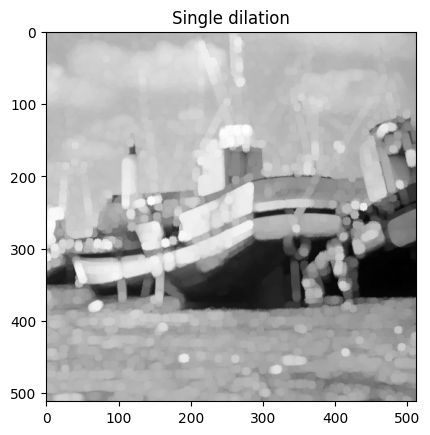

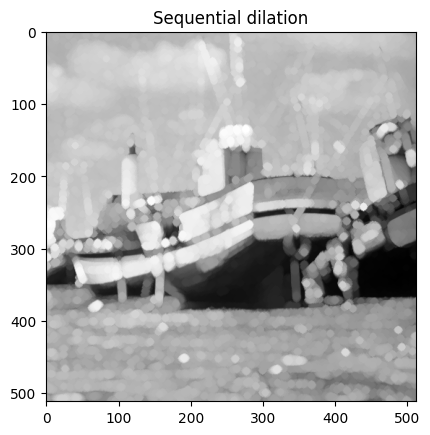

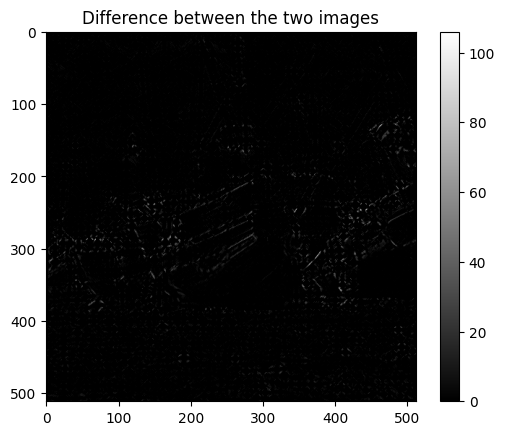

195761


In [50]:
if student:
  ### start code
  dilation = morpho.dilation(img,morpho.disk(5))
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()

  sequential_dilation = morpho.dilation(morpho.dilation(img,morpho.disk(2)),morpho.disk(3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()

  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** Plot the result of an dilation by a disk structuring element of size 2 followed by
an dilation by a disk structuring element of size 3? 
Compare with a dilation of the image by (a disk of size 2 dilated by a disk of size 3). Please note that you might have to use the np.pad function to perform this. Conclude.
- **A:** Since the norm of the difference between the two images is equal to 0 they are the same image, thus dilating by a disk of radius 2 then by a disk of radius 3 is the same as dilating by a disk of radius 2 dilated by a disk of radius 3.

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


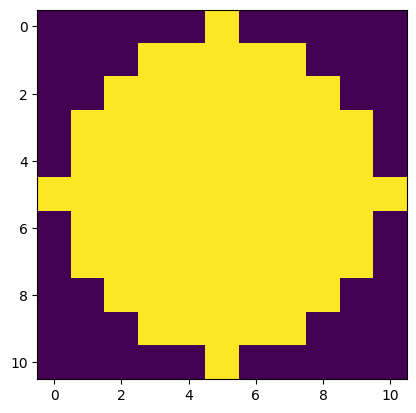

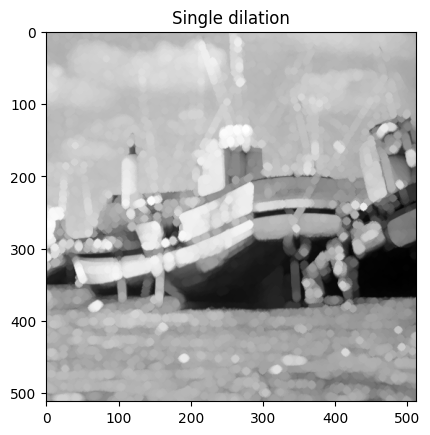

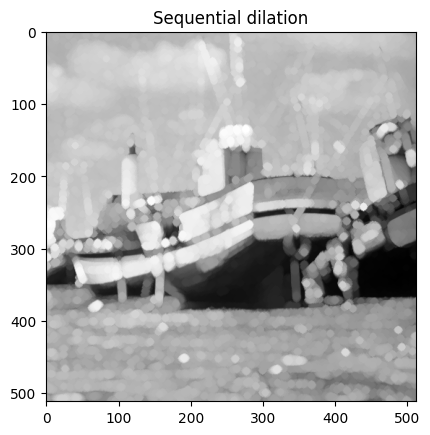

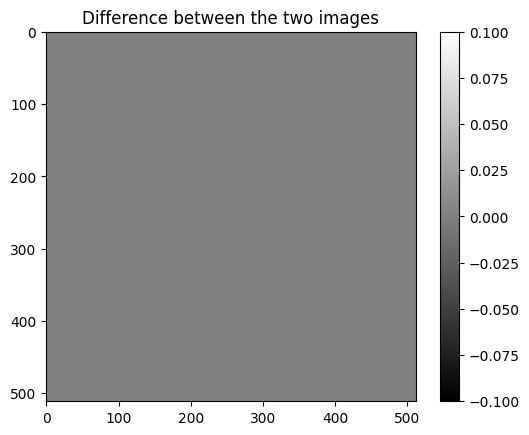

0


In [48]:
if student:
 # First create the sequential structuring element, that is a disk of size 2 dilated by a disk of size 3
  sqr_strell = morpho.disk(2)
  sqr_strell = np.pad(sqr_strell,(3,3),'constant',constant_values=(0,0))
  sqr_strell = morpho.dilation(sqr_strell,morpho.disk(3))
  print(sqr_strell)
  plt.imshow(sqr_strell)
  plt.show()

  # Use it to perform the image dilation
  dilation = morpho.dilation(img,sqr_strell)
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()
  
  # Compare it with the sequential dilation
  sequential_dilation = morpho.dilation(morpho.dilation(img,morpho.disk(2)),morpho.disk(3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()
    
  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** How can you illustrate the idempotence of closing ? Show your illustration in the following cell.


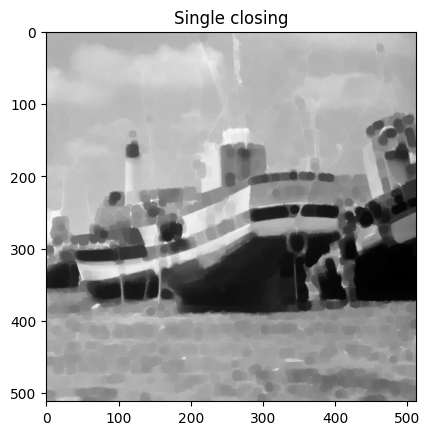

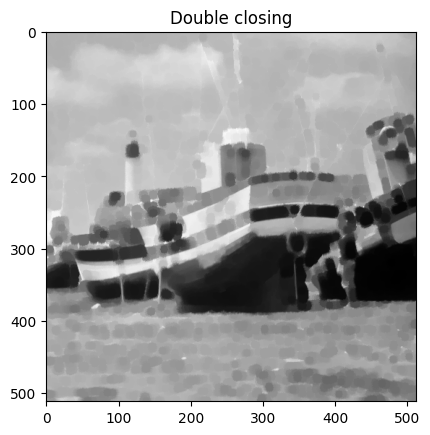

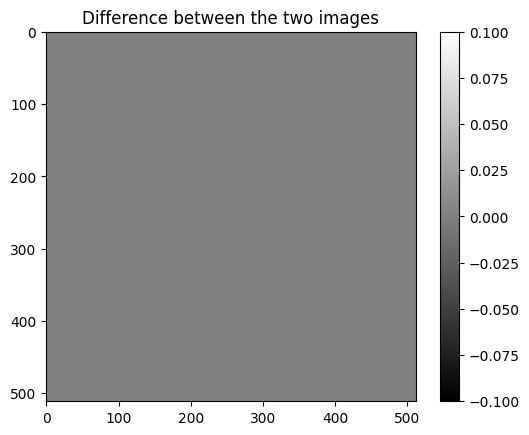

0


In [45]:
if student :
  strell = morpho.disk(5)

  closing = morpho.closing(img,strell)
  plt.imshow(closing,cmap = "gray")
  plt.title("Single closing")
  plt.show()
  
  double_closing = morpho.closing(closing,strell)
  plt.imshow(double_closing,cmap = "gray")
  plt.title("Double closing")
  plt.show()
    
  plt.imshow(closing-double_closing,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(closing-double_closing)))

- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : Performing a top-hat transform with a line as a structuring element makes details appear that are oriented at a 90° angle compared to the structuring element. Those detail appear mainly on homogenous zones which take up a lot of space, fine lines appear black after the transform. If we use a horizontal line, bright zones appear between the vertical cables on the boats and the left and right sides of the ropes behind the middle boat. We obtain the same result except with horizontal cables if we use a vertical structuring element. Finally if we use a disk, details appear in every direction with the same intensity since a disk gives the same importance to every direction.

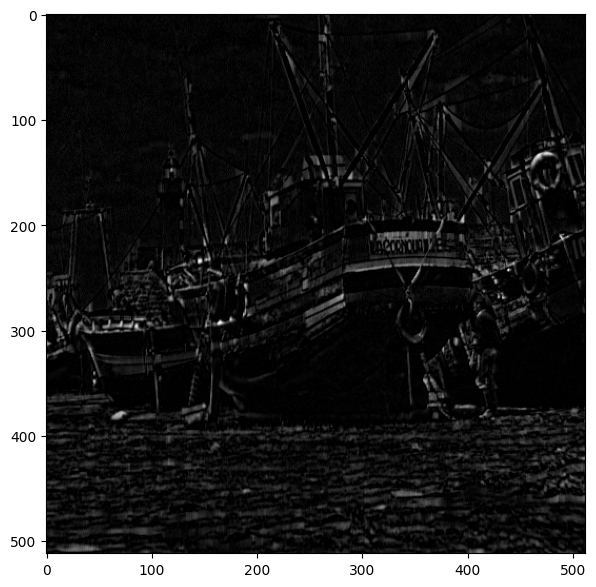

In [64]:
if student:
  strell = line_strell(3,10)
  #strell = line_strell(10,3)
  #strell = morpho.disk(2)
  top_hat = morpho.white_tophat(img,strell)
plt.figure(figsize = (7,7))
plt.imshow(top_hat,cmap = "gray")
plt.show()

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : Pretty much the opposite from a top-hat transform, performing a dual top-hat transform with a line as a structuring element makes details appear that are oriented at a 90° angle compared to the structuring element. Those detail appear mainly on fine lines, homogenous zones appear black after the transform. If we use a horizontal line, vertical lines such as cables and masts appear white. We obtain the same result except with horizontal cables if we use a vertical structuring element. Finally if we use a disk, details appear in every direction with the same intensity since a disk gives the same importance to every direction.

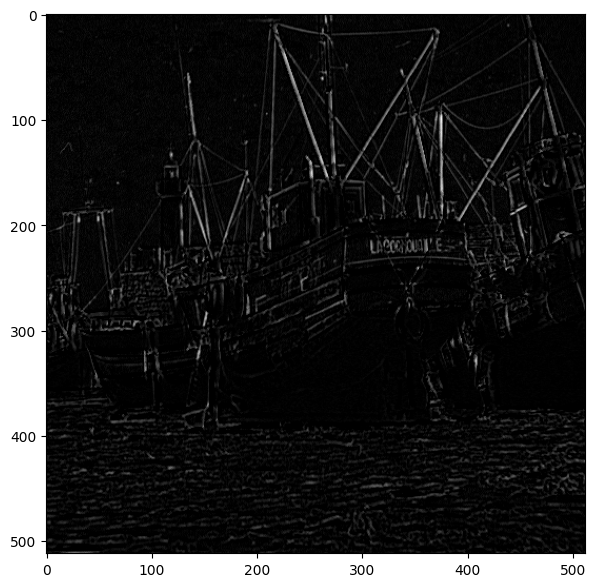

In [66]:
if student:
  #strell = line_strell(1,5)
  strell = line_strell(5,1)
  strell = morpho.disk(2)
  dual_top_hat = morpho.black_tophat(img,strell)
plt.figure(figsize = (7,7))
plt.imshow(dual_top_hat,cmap = "gray")
plt.show()

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by performing sequential opening and then closing by squares of radius ranging from 1 to 5. Also try out your own combinations. What kind of filtering can be expected from such
operations?
- **A**:The alternating openings and closings gradually transform the image into a less detailled version of itself, it becomes pixelated. The disappearance of details is associated with low-pass filters so all in all these operations apply a low-pass on the image.

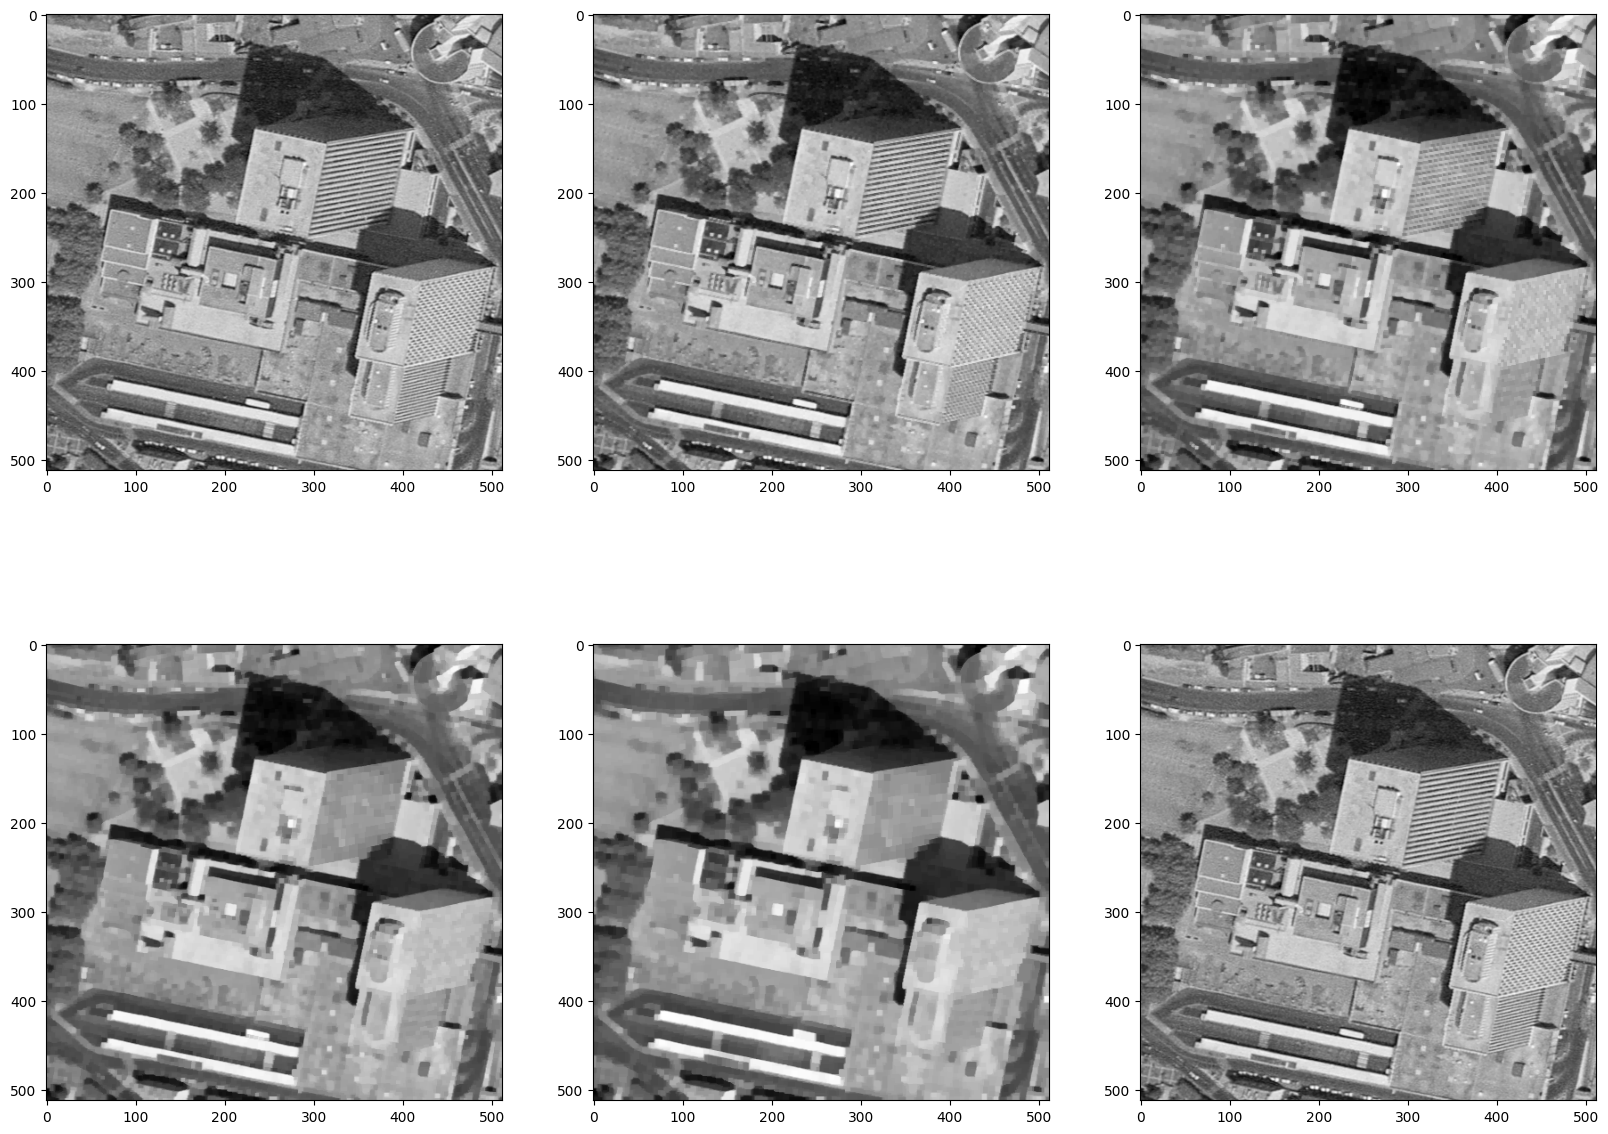

In [67]:
# Example
img = skio.imread("images/montreuil.tif")

# Structuring elements
se1=morpho.square(1)
se2=morpho.square(2)
se3=morpho.square(3)
se4=morpho.square(4)
se5=morpho.square(5)

# Images
fas1=morpho.closing(morpho.opening(img,se1),se1)
fas2=morpho.closing(morpho.opening(fas1,se2),se2)
fas3=morpho.closing(morpho.opening(fas2,se3),se3)
fas4=morpho.closing(morpho.opening(fas3,se4),se4)
fas5=morpho.closing(morpho.opening(fas4,se5),se5)

fig,ax = plt.subplots(2,3,figsize = (20,15))
ax[0,0].imshow(fas1,cmap = "gray")
ax[0,1].imshow(fas2,cmap = "gray")
ax[0,2].imshow(fas3,cmap = "gray")
ax[1,0].imshow(fas4,cmap = "gray")
ax[1,1].imshow(fas5,cmap = "gray")
ax[1,2].imshow(img,cmap = "gray")
plt.show()

#Try you own
if student :
  ...
   

### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: The morphological gradient is indeed a gradient method: we started with an image of cells and we now have an image on which remain only the edges of those cells and their kernels.

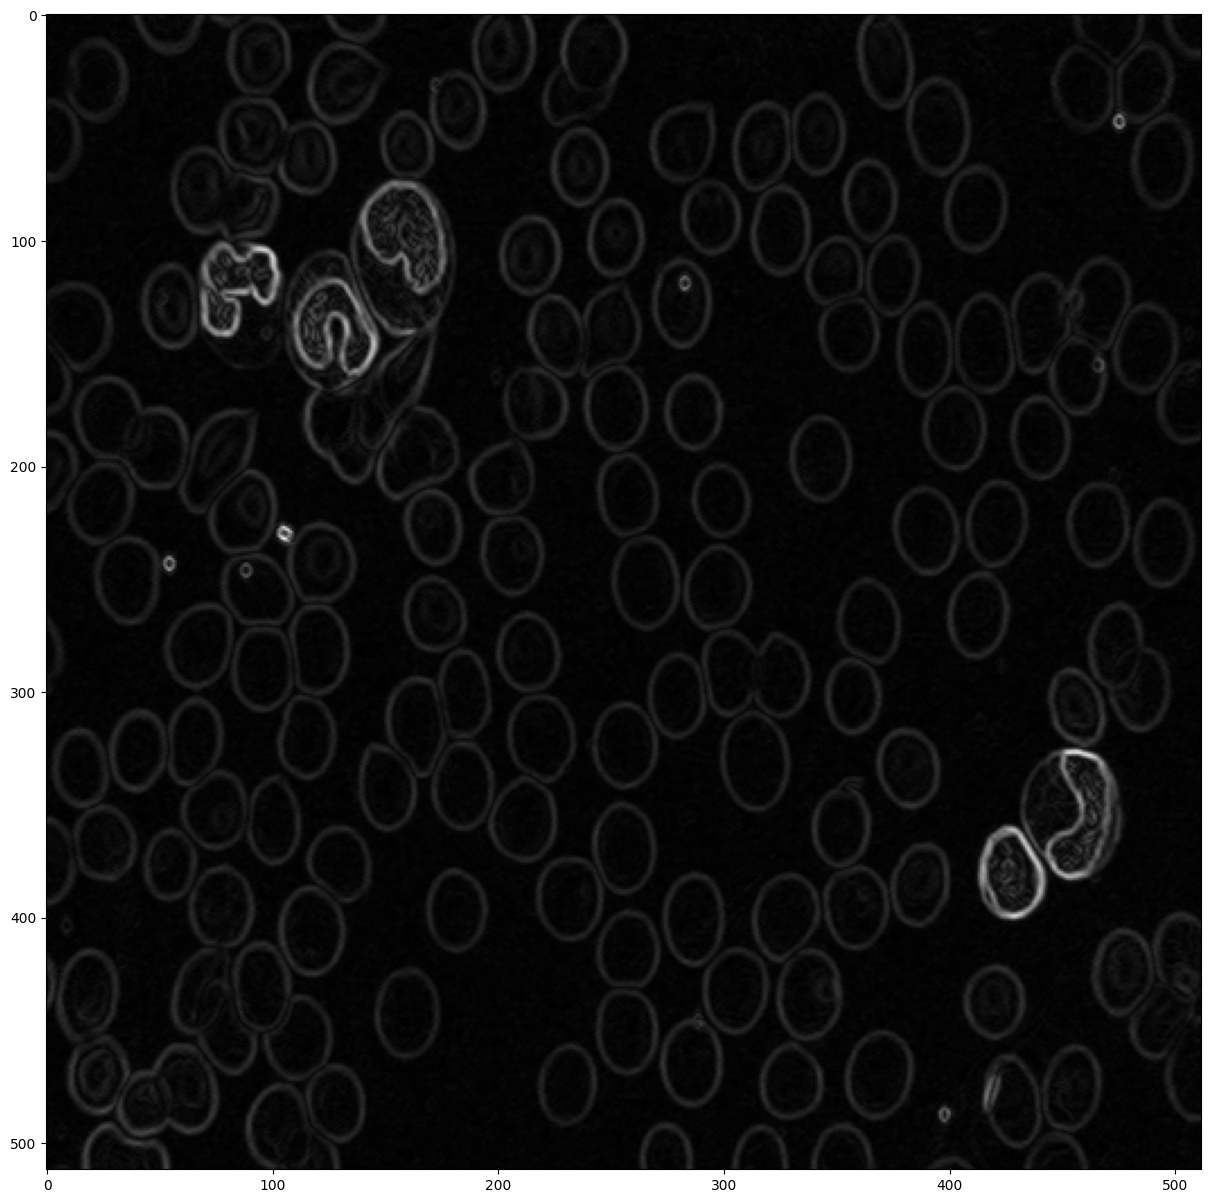

In [68]:
if student : 
  img = skio.imread("images/cell.tif")
  morpho_grad = morpho.dilation(img,morpho.disk(1))-morpho.erosion(img,morpho.disk(1))
plt.figure(figsize=(15,15))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()


- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is is difficult to find an appropriate threshold value ?
- **A** : It is hard to threshold the gradient because its values are mostly low because the original image as a gray background. The image has low contrast, the gray level of the cells is not that far from the gray level of the background and the edges obtained thanks to the gradient do not have a constant value which makes thresholding hard if we want to avoid obtaining incomplete edges. If we try to set the threshold so that all the edges of the objects appear the threshold may be too low and the edges will enlarge. This happens if we choose a value of 5 for example: We only keep the edges of the cells but they are several pixels large.

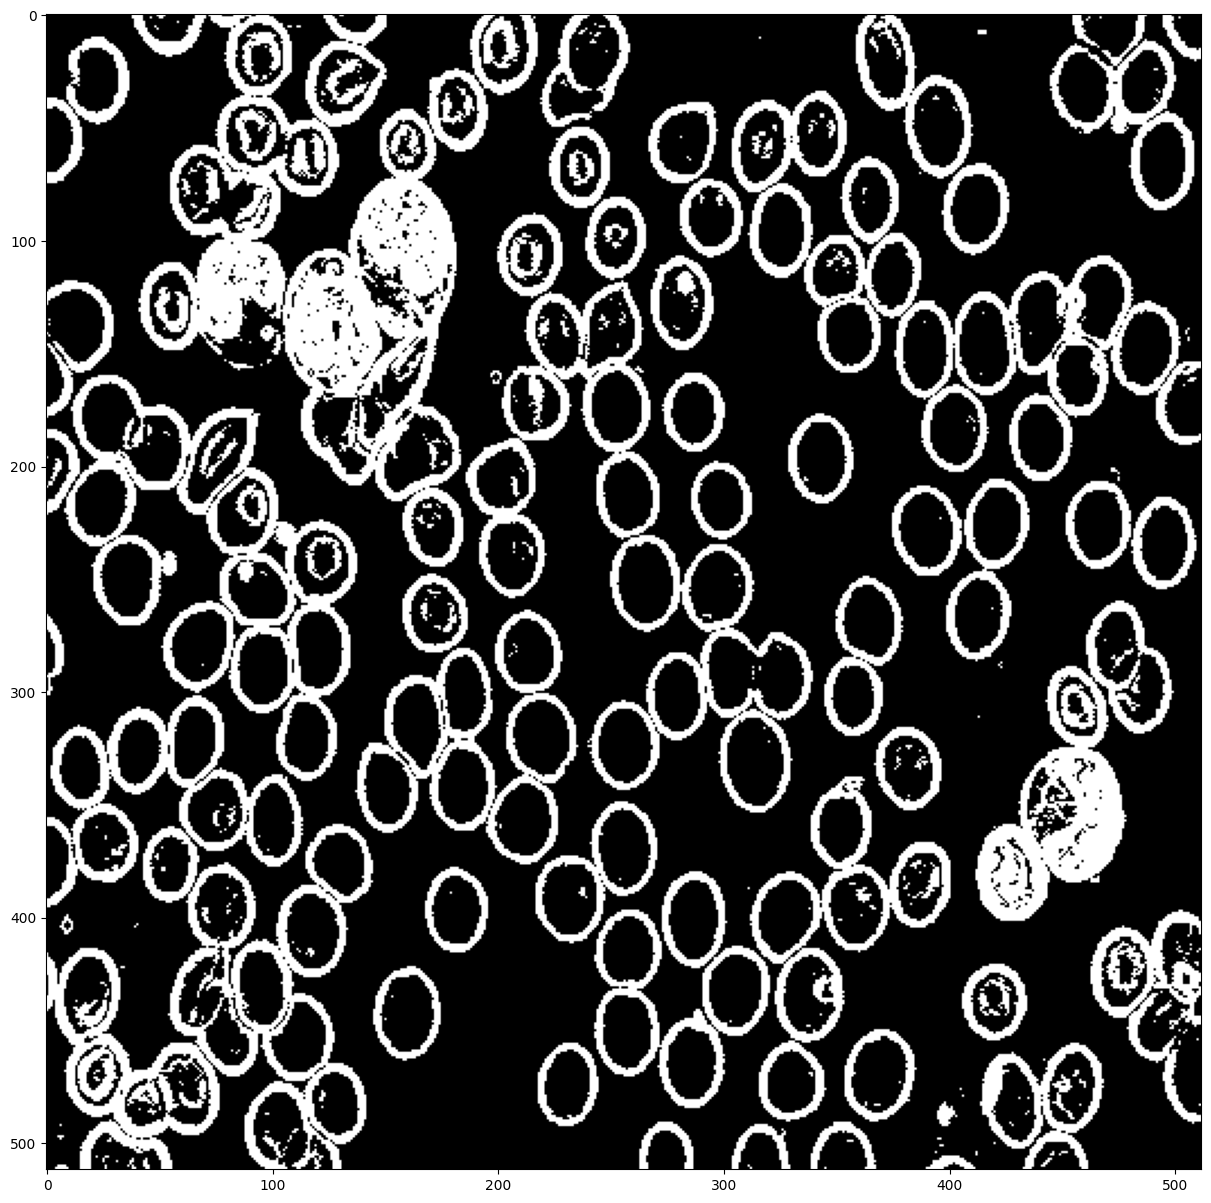

In [72]:
if student :
  thresh_grad = morpho_grad>5
plt.figure(figsize=(15,15))
plt.imshow(thresh_grad,cmap  ="gray")
plt.show()

- **Q** Apply the watershed algorithm to the gradient image using morpho.watershed(morpho_grad,k) ;
What do you observe ? 
- **A** :The image is segmented in different regions with a different color each. Some of them are onlhy one cell, which helps us if we want to process the image afterwards but some regions contain multiple cells which would hinder further analysis.
- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A** :k represents the number of markers or the number of classes (color zones) that the algorithm will find and display.

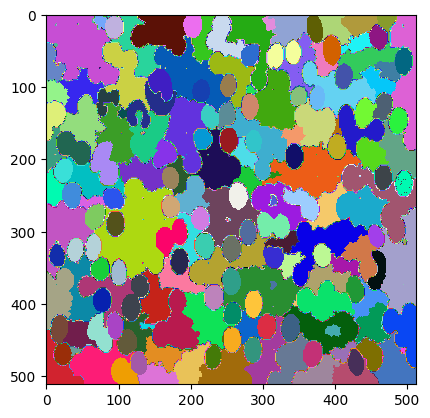

In [86]:
import matplotlib
cmaprand = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
if student :
  wat = seg.watershed(morpho_grad,300)

plt.imshow(wat, cmap =cmaprand)
plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better ? In which sense and why ?
- **A** : Since the closing creates junctions between objects, applying the watershed afterwards allows us to detect more cells and detach them from the background but some of them are going to end up being together in the same class after the watershed.
- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous? 
- **A** : On the contrary, the opening separates the objects so they will be less classes with multiple cells in them but the cells are going to change shape and the segmentation will not be truthful to reality.\
\
Compared to using the algorithm on the gradient and choosing a high number of markers those method do not really bring an inrease in quality of detection.

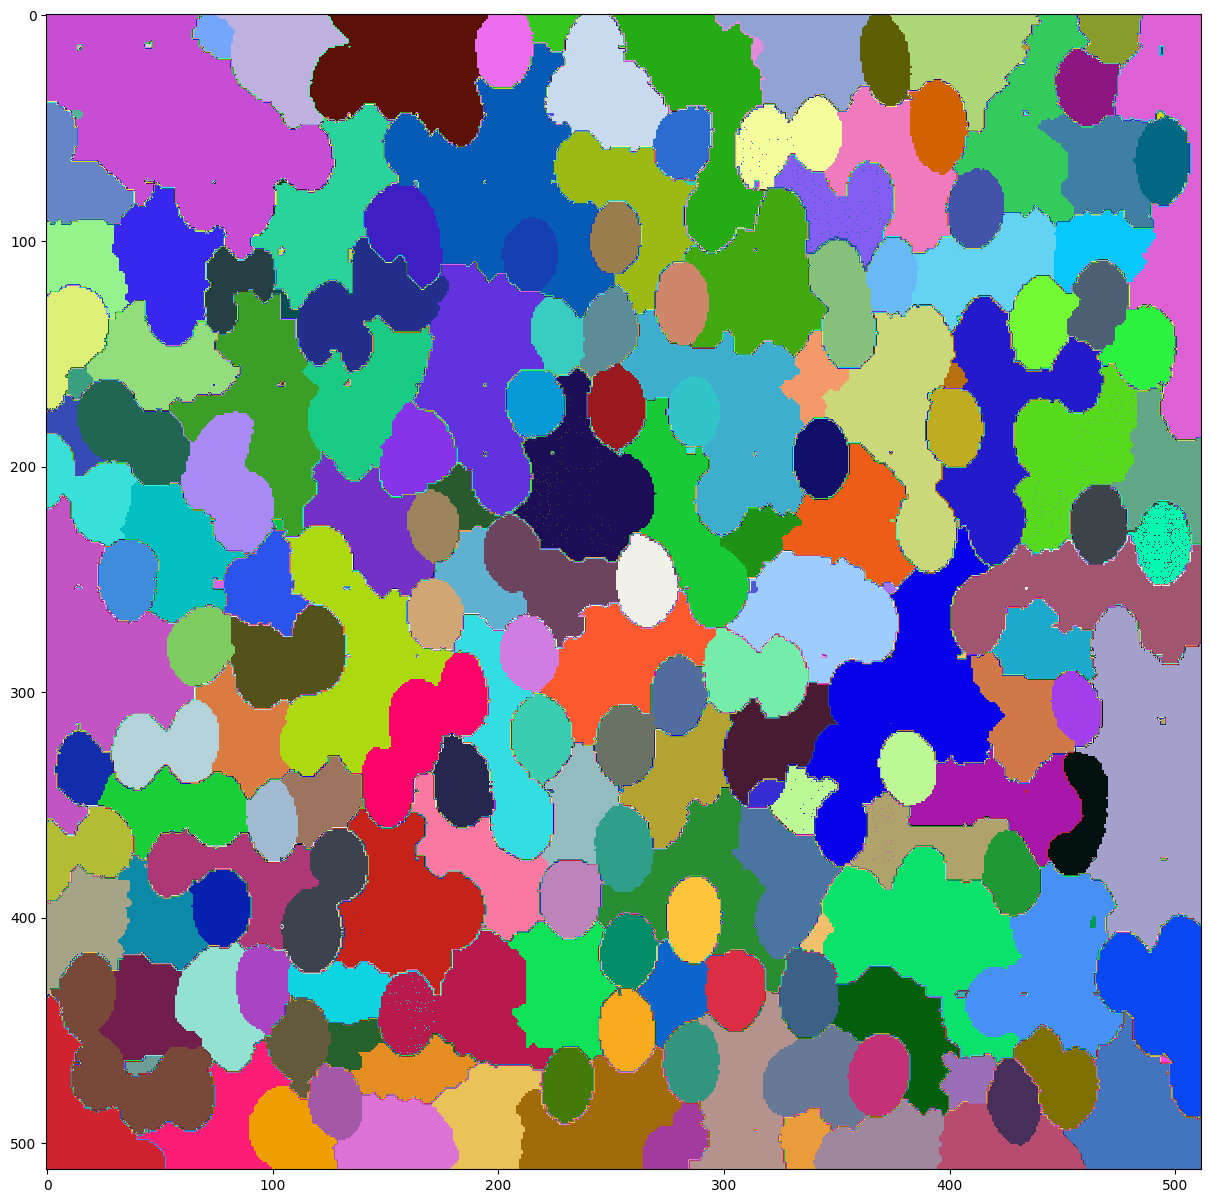

In [125]:
if student :
  wat_closing = seg.watershed(morpho.closing(morpho_grad,morpho.disk(2)),300)
plt.figure(figsize =(15,15))
plt.imshow(wat_closing,cmap =cmaprand)
plt.show()

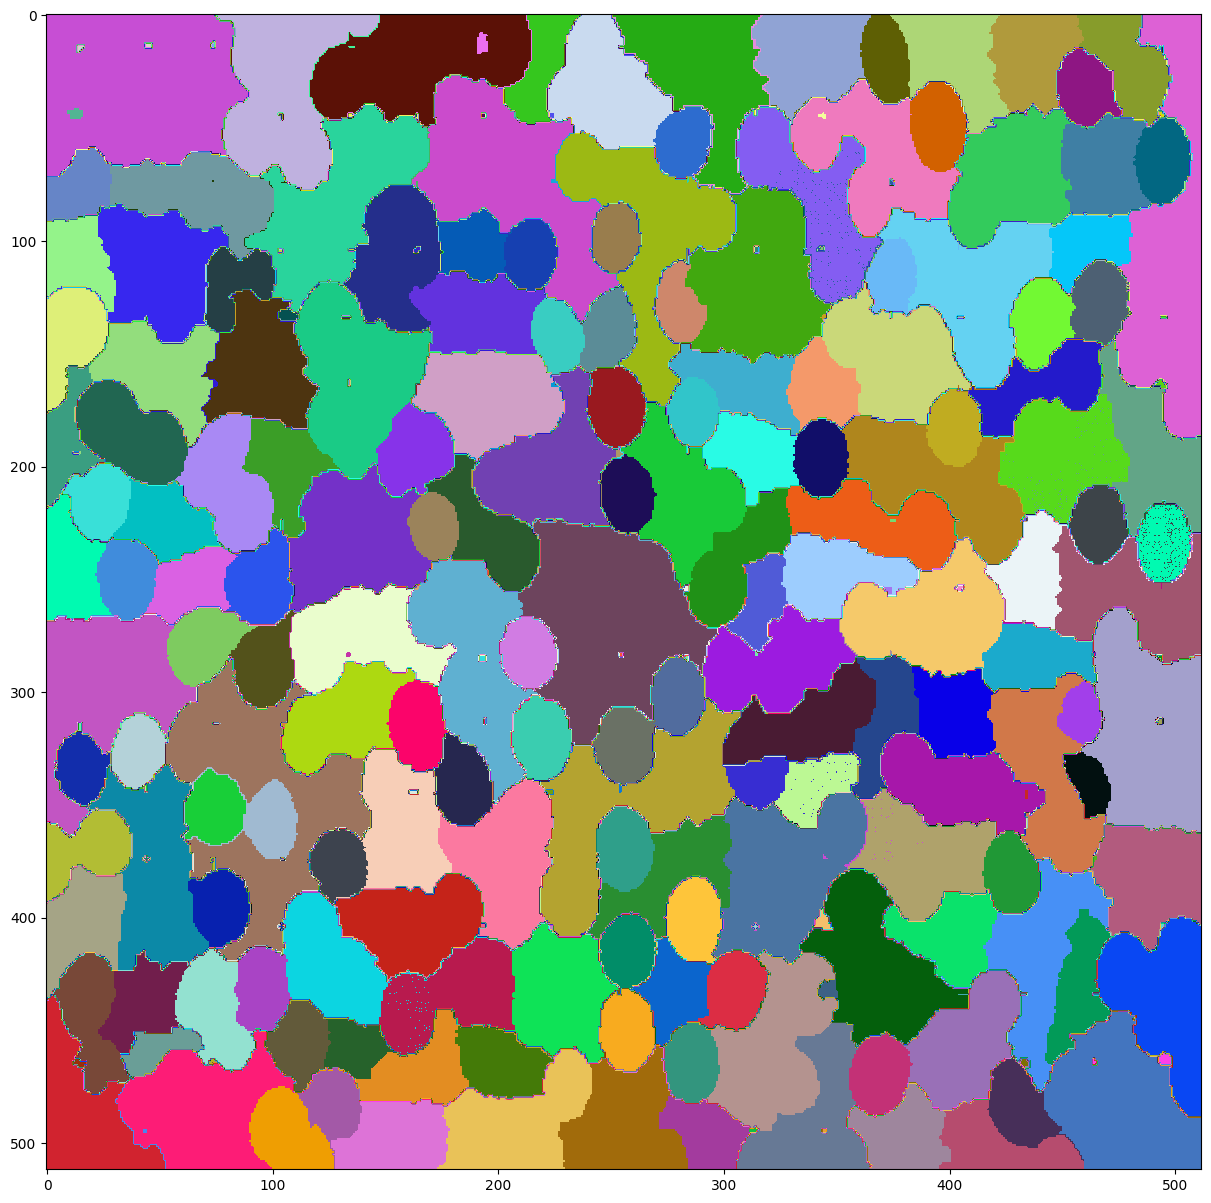

In [96]:
if student :
  wat_opening = seg.watershed(morpho.opening(morpho_grad,morpho.disk(2)),300)
plt.figure(figsize =(15,15))
plt.imshow(wat_opening,cmap =cmaprand)
plt.show()

Your objective is to try to do better than what you did with the closure and opening. To do that, we propose to use specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. You can use as structuring element a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : The reconstruction from an opening returns an image which looks like the gradient but has a lot of noise which would only bother us to segment the cells.

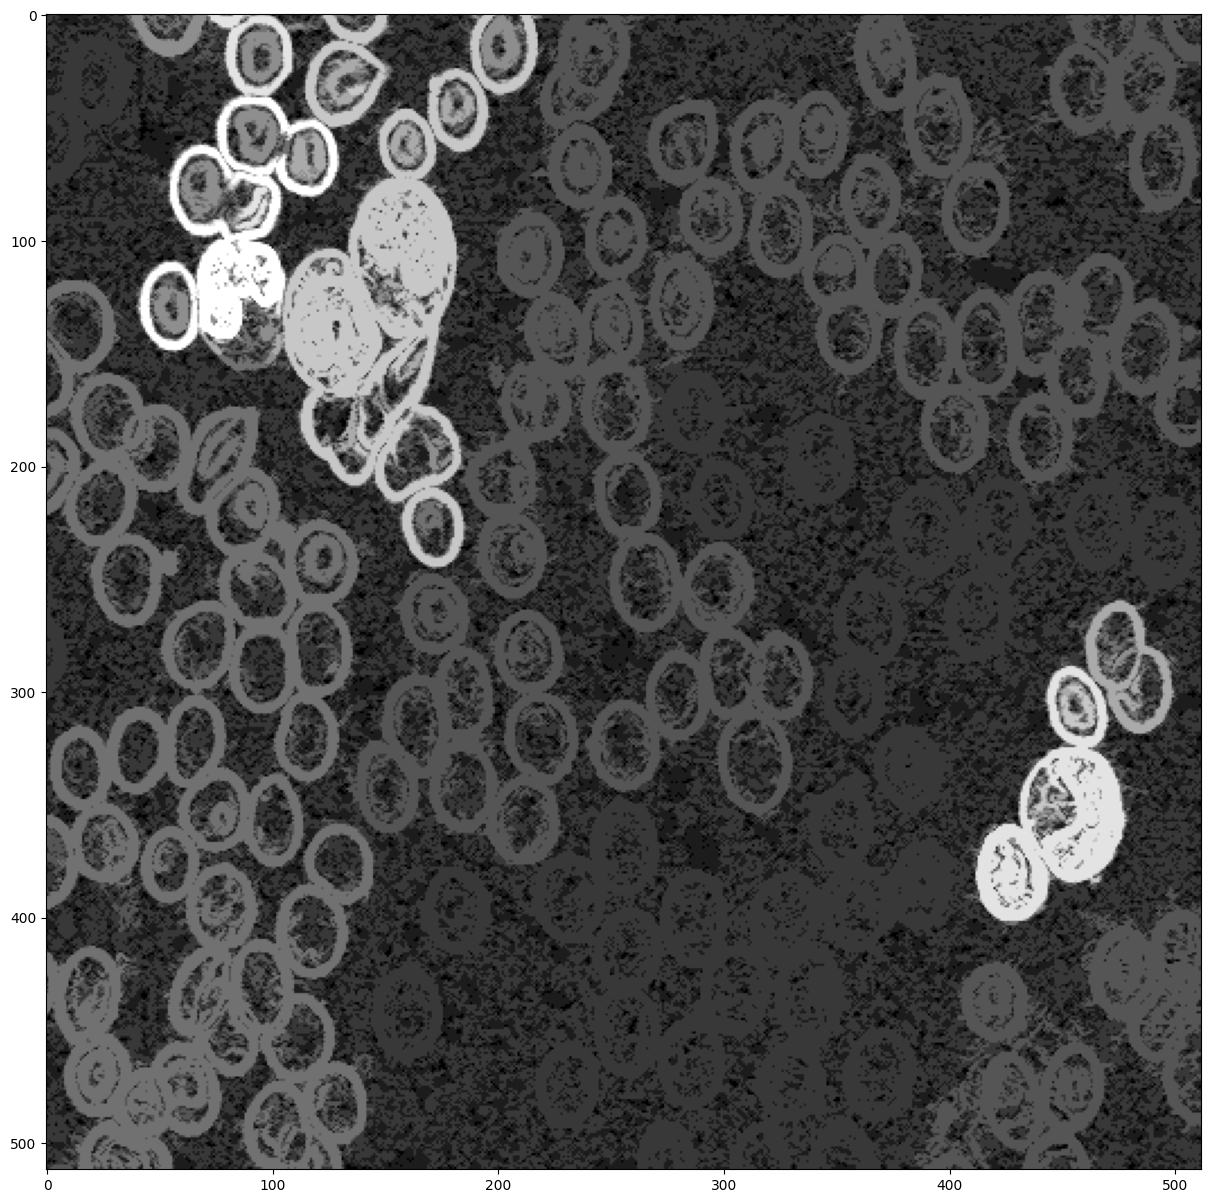

In [137]:
imOpen = morpho.opening(morpho_grad,morpho.disk(5))
reco=morpho.reconstruction(imOpen,morpho_grad)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. You can use as structuring alement a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : On the other hand, reconstruction from a closing of the gradient returns an image that looks a lot like the gradient but without small details like the texture inside the cells which is not useful for segmentation.

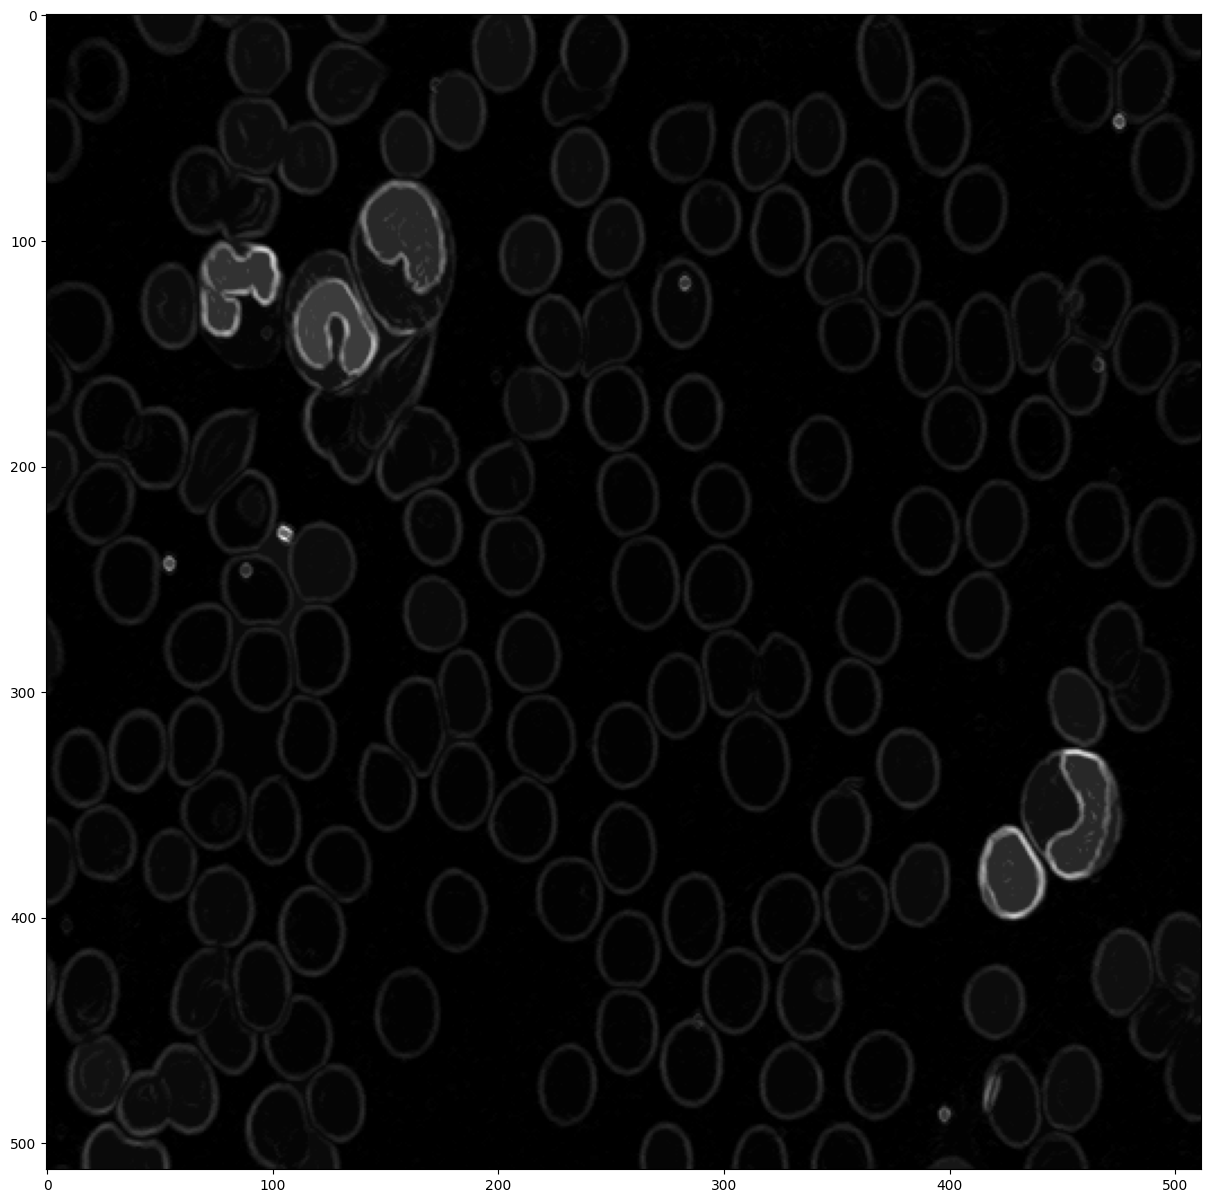

In [142]:
imClos = morpho.closing(morpho_grad,morpho.disk(5))
reco=morpho.reconstruction(imClos,morpho_grad,method='erosion')
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : This last part is less guided. Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

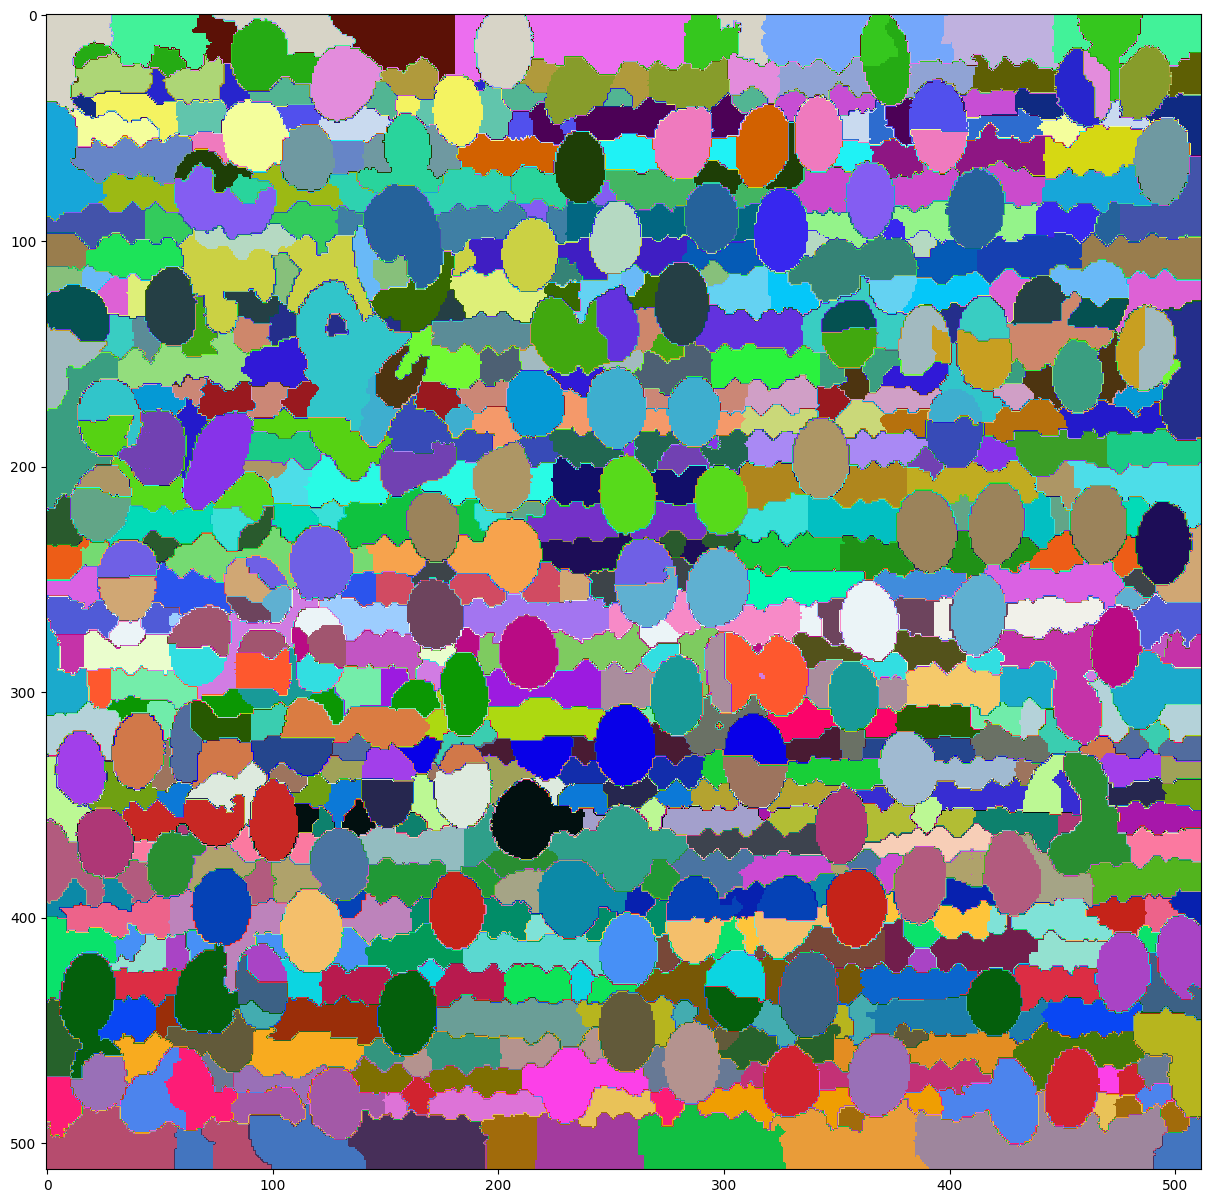

In [150]:
markers_coord = skimage.feature.peak_local_max(255-reco,min_distance=10)
markers = np.zeros((512,512))
for i in markers_coord:
    markers[i[0]][i[1]] = 255
markers = morpho.label(markers)
wat = seg.watershed(reco,markers)
plt.figure(figsize =(15,15))
plt.imshow(wat,cmap =cmaprand)
plt.show()